In [1]:
from community_knapsack import *
from evaluation import evaluation

In [2]:
# The algorithms to use for this evaluation:
exact_algorithms = [
    PBSingleAlgorithm.MEMOIZATION,
    PBSingleAlgorithm.DYNAMIC_PROGRAMMING,
    PBSingleAlgorithm.BRANCH_AND_BOUND,
    PBSingleAlgorithm.ILP_SOLVER
]

approximation_algorithms = [
    PBSingleAlgorithm.GREEDY,
    PBSingleAlgorithm.RATIO_GREEDY,
    PBSingleAlgorithm.FPTAS,
    PBSingleAlgorithm.SIMULATED_ANNEALING,
    PBSingleAlgorithm.GENETIC_ALGORITHM
]

In [3]:
# The boundaries of this evaluation:
start_num_projects = 20
end_num_projects = 100
step_num_projects = 20

num_voters = 3000

start_budget = 100_000
end_budget = 1_000_000
step_budget = 100_000

cost_bound = (5_000, 50_000)

In [4]:
# Set the global x-axis for this evaluation:
x_axis = list(range(start_num_projects, end_num_projects + 1, step_num_projects))

# Set the global y-axis for this evaluation:
y_axis = list(range(start_budget, end_budget + 1, step_budget))

In [5]:
# Generate the problems using the evaluation tools:
problems = evaluation.generate_single_problems(
    num_project_bounds=[(p, p) for p in x_axis],
    num_voters_bounds=[(num_voters, num_voters)],
    budget_bounds=[(b, b) for b in y_axis],
    cost_bounds=[cost_bound]
)

In [6]:
# Obtain the exact results for this evaluation:
exact_results = evaluation.solve_problems(
    problem_list=problems,
    algorithms=exact_algorithms,
    timeout=40,
    max_fail=-1,
    file_name='ext-changing-both.json',
    output=True
)
exact_results = evaluation.format_3d(exact_results, x_axis, y_axis)

In [7]:
# Obtain the exact results for this evaluation:
approximation_results = evaluation.solve_problems(
    problem_list=problems,
    algorithms=approximation_algorithms,
    timeout=40,
    max_fail=-1,
    file_name='apx-changing-both.json',
    output=True
)
approximation_results = evaluation.format_3d(approximation_results, x_axis, y_axis)

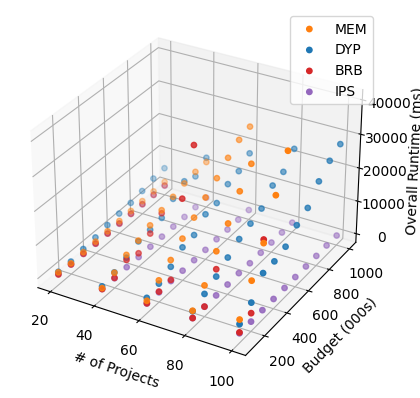

In [8]:
%matplotlib inline
evaluation.plot_3d(
    x_axis=x_axis,
    y_axis=y_axis,
    z_axes=evaluation.get_z_axes(exact_results, exact_algorithms, 2),
    x_label='# of Projects',
    y_label='Budget (000s)',
    z_label='Overall Runtime (ms)',
    labels=evaluation.get_labels(exact_algorithms),
    colors=evaluation.get_colors(exact_algorithms),
    sizes=evaluation.get_3d_sizes(exact_algorithms),
    y_tick_limits=(3, 3),
    mpl_use=''
)

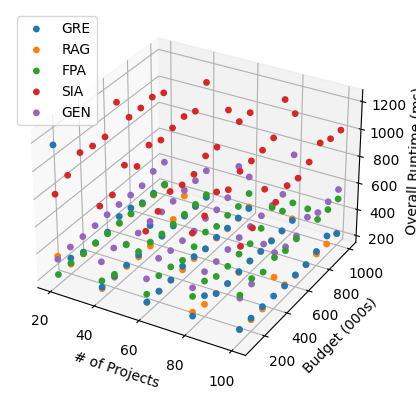

In [9]:
%matplotlib inline
evaluation.plot_3d(
    x_axis=x_axis,
    y_axis=y_axis,
    z_axes=evaluation.get_z_axes(approximation_results, approximation_algorithms, 2),
    x_label='# of Projects',
    y_label='Budget (000s)',
    z_label='Overall Runtime (ms)',
    labels=evaluation.get_labels(approximation_algorithms),
    colors=evaluation.get_colors(approximation_algorithms),
    alphas=evaluation.get_alphas(approximation_algorithms),
    sizes=evaluation.get_3d_sizes(approximation_algorithms),
    y_tick_limits=(3, 3),
    mpl_use=''
)

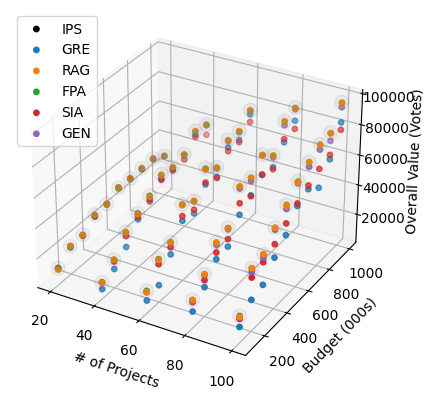

In [10]:
%matplotlib inline
evaluation.plot_3d(
    x_axis=x_axis,
    y_axis=y_axis,
    z_axes=evaluation.get_z_axes(exact_results, [PBSingleAlgorithm.ILP_SOLVER], 0) + evaluation.get_z_axes(approximation_results, approximation_algorithms, 0),
    x_label='# of Projects',
    y_label='Budget (000s)',
    z_label='Overall Value (Votes)',
    labels=['IPS'] + evaluation.get_labels(approximation_algorithms),
    colors=['black'] + evaluation.get_colors(approximation_algorithms),
    alphas=[0.05],
    sizes=[100] + evaluation.get_3d_sizes(approximation_algorithms),
    y_tick_limits=(3, 3),
    mpl_use=''
)